In [13]:
import pandas as pd
import io
import requests

In [14]:
url="https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [15]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [16]:
data.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [17]:
data.shape

(4383, 5)

In [18]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

#### Q1) Set 'Date' column as Index of the dataframe. Be sure the index is a time-series<font color= 'Blue'> (10 points) </font>

In [19]:
data['Date'] = pd.to_datetime(data['Date'])

In [20]:
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [21]:
data = data.set_index('Date')
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


#### Q2) Add New columns as 'Year', 'Month' and 'Name of Weekday' to the new DataFrame <font color= 'Blue'> (10 points) </font>

In [22]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Name of Weekday'] = data.index.day_name()


In [23]:
data

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Name of Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [24]:
data.dtypes

Consumption        float64
Wind               float64
Solar              float64
Wind+Solar         float64
Year                 int64
Month                int64
Name of Weekday     object
dtype: object

#### Q3) Describe the Consumption, Wind, Solar,  Wind+Solar, Year, Month, Weekday Name on 2017-09-23' <font color= 'Blue'> (5 points) </font>

In [25]:
data.loc['2017-09-23'].describe()

count        7.00000
unique       7.00000
top       1191.10345
freq         1.00000
Name: 2017-09-23 00:00:00, dtype: float64

#### Q4) What is the Consumption, Wind, Solar,  Wind+Solar, Year, Month, Weekday Name between 2017-09-01 and 2017-09-30 <font color= 'Blue'> (10 points) </font>

In [26]:
data.loc['2017-09-01':'2017-09-30']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Name of Weekday
Date,,,,,,,
2017-09-01,1361.78735,34.233,83.407,117.640,2017,9,Friday
2017-09-02,1135.72984,37.373,106.189,143.562,2017,9,Saturday
2017-09-03,1057.50932,26.179,140.194,166.373,2017,9,Sunday
2017-09-04,1359.36636,81.042,168.123,249.165,2017,9,Monday
2017-09-05,1391.71549,107.604,135.541,243.145,2017,9,Tuesday
2017-09-06,1421.76263,409.909,92.002,501.911,2017,9,Wednesday
2017-09-07,1406.76505,328.328,100.497,428.825,2017,9,Thursday
2017-09-08,1407.68179,516.670,82.393,599.063,2017,9,Friday
2017-09-09,1187.91825,276.054,63.259,339.313,2017,9,Saturday


In [27]:
import matplotlib.pyplot as plt

#### Q5) Use .plot(marker='.',alpha=0.5,linestyle='None', figsize=(11,9)) command to visualize the ['Consumption', 'Solar', 'Wind'] in subplots <font color= 'Blue'> (15 points) </font>

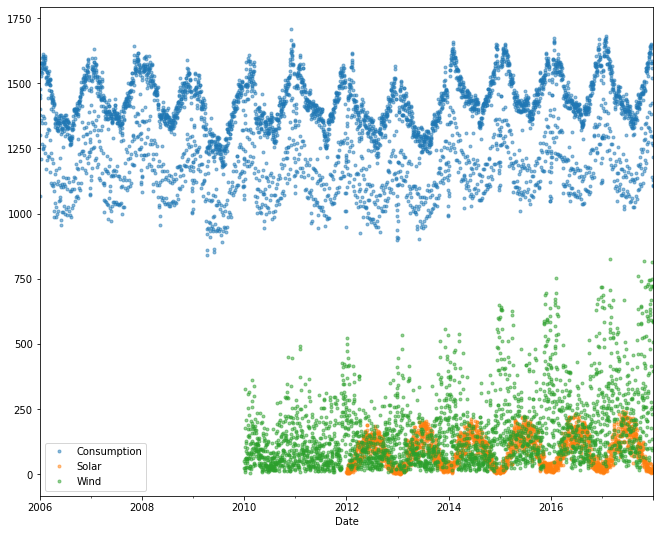

In [45]:
df_plot = data[['Consumption', 'Solar', 'Wind']]
fig, ax = plt.subplots(figsize=(11, 9))
df_plot.plot(marker='.', alpha=0.5, linestyle='None', ax=ax)
plt.show()

#### Q6) According to the graphs interpret the graphs:  <font color= 'Blue'> (15 points) </font>

__1)__ What is the behavior of energy consumption in year/in seasons?

Answer:  There is a growing demand for energy. This could be due to a number of factors, including population growth, economic development, and increasing energy-intensive technologies.

__2)__ What can we say about solar/wind production?

Answer: The graphs show that solar and wind production are also increasing every year, it suggests that there is a growing interest in renewable energy sources

#### Q7) Resample the data (take ['Consumption', 'Wind', 'Solar', 'Wind+Solar'] columns ) to a monthly mean time series. Save the new dataFrame as data_new_mean and give 8 samples on it.  <font color= 'Blue'> (10 points) </font>

In [49]:
data_new_mean = data[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].resample('M').mean()
data_new_mean = data_new_mean.round(2)

print(data_new_mean.sample(8))


            Consumption    Wind   Solar  Wind+Solar
Date                                               
2006-04-30      1275.06     NaN     NaN         NaN
2006-09-30      1311.17     NaN     NaN         NaN
2011-04-30      1300.73  116.67     NaN         NaN
2016-06-30      1332.43  112.30  158.89      271.20
2014-09-30      1347.64   81.70   96.18      177.87
2010-11-30      1436.85  126.09     NaN         NaN
2016-08-31      1293.60  152.98  152.25      305.23
2015-07-31      1341.60  189.94  158.63      348.57


#### Q8) Use Rolling transformation to compute the 30-day rolling mean of our daily data.  Save this new dataFrame as data_new_rolling <font color= 'Blue'> (10 points) </font>

In [56]:
data_new_rolling = data[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].rolling(window=30).mean()
data_new_rolling = data_new_rolling.round(2)

data_new_rolling.sample(10)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2011-05-08,1283.00,97.55,NaN,NaN
2006-05-27,1241.42,NaN,NaN,NaN
2014-08-17,1288.38,93.46,134.34,227.80
2012-06-26,1218.46,98.52,120.00,218.52
2007-08-05,1262.37,NaN,NaN,NaN
2015-10-05,1348.08,158.97,111.32,270.29
2012-06-14,1214.33,89.27,127.87,217.14
2013-12-01,1358.91,144.95,26.52,171.47
2016-07-22,1328.71,175.85,166.82,342.67


#### Q9) See the differences betweenolling mean and resampling, let’s update our earlier plot of January 2017-December 2017 wind power production to include the 30-day rolling mean along with the monthly mean resampled time series and the original daily data. <font color= 'Blue'> (15 points) </font> 

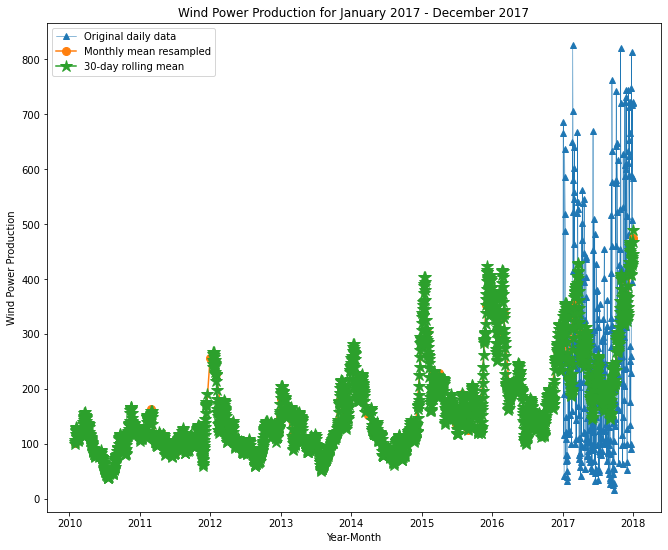

In [59]:
plt.figure(figsize=(11,9))

plt.plot(data['Wind']['2017-01-01':'2017-12-31'], marker="^", linestyle='-', linewidth=0.5, label='Original daily data')
plt.plot(data_new_mean['Wind'], marker='o', markersize=8, linestyle='-', label='Monthly mean resampled')
plt.plot(data_new_rolling['Wind'], marker='*', markersize=12, linestyle='-', label='30-day rolling mean')

plt.legend()
plt.title('Wind Power Production for January 2017 - December 2017')
plt.xlabel('Year-Month')
plt.ylabel('Wind Power Production')

plt.show()
